## Exploring original SSOC codes selected by Emp

**Author:** Benjamin 
<br>
**Date:** 30th Oct 2022
<br>
**Context:** Trying to understand the extent of the wrongly selected SSOCs by employeers
<br>
**Objective:** Get SSOCs from the API calls based on the exisitng labelled test set


### A) Importing packages and reading in the dataset

In [148]:
import pandas as pd
import hashlib
import glob
import requests
import time
from csv import DictWriter
import tqdm
import hashlib 
from tqdm.auto import tqdm
import ast
from statistics import mean
tqdm.pandas()

In [2]:
df_test= pd.read_csv("../Data/Test.csv")

In [3]:
# Get CSV files list from a folder
path = "../Data/mcf_api_responses_csv"
csv_files = glob.glob(path + "/*.csv")

# Read each CSV file into DataFrame
# This creates a list of dataframes
df_list = (pd.read_csv(file) for file in csv_files)

# Concatenate all DataFrames
df = pd.concat(df_list, ignore_index=True)

In [4]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2890 entries, 0 to 2889
Data columns (total 4 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   MCF_Job_Ad_ID        2890 non-null   object
 1   Predicted_SSOC_2020  2890 non-null   int64 
 2   title                2890 non-null   object
 3   description          2890 non-null   object
dtypes: int64(1), object(3)
memory usage: 90.4+ KB


Removing entries withought MCF Job Ad ID

In [5]:
names = list(df_test.columns)
names[0] = "Index"

In [6]:
df_test.columns = names

In [7]:
df_test.head()

,Index,Predicted_SSOC_2020,title,description
0,MCF-2021-0042824,42241,Admin/Receptionist,Handling telephone calls and enquiries. Attend...
1,MCF-2021-0142643,51421,Beautician Supervisor,"Understand customer needs & skin condition, an..."
2,MCF-2021-0182163,21494,Senior / Quantity Surveyor (C&S/Tender/Project),"Responsible for payment/progress claims, varia..."
3,MCF-2021-0090664,12133,Compliance Manager [FinTech / Risk Management ...,"Manage compliance risk strategies, policies an..."
4,MCF-2021-0159738,21422,Building and Construction Site Engineer,Supervise and coordinate the activities of sit...


In [8]:
df = df[["uuid", "title", "description"]]

In [9]:
df.columns = ["MCF_UUID", "Job_title", "Orginal_description"]

In [10]:
df = df.drop_duplicates(subset=["Orginal_description"], keep='last')

In [11]:
df_test['MCF_UUID'] = [hashlib.md5(job_id.encode()).hexdigest() for job_id in df_test['Index']]

In [12]:
df_test.head()

,Index,Predicted_SSOC_2020,title,description,MCF_UUID
0,MCF-2021-0042824,42241,Admin/Receptionist,Handling telephone calls and enquiries. Attend...,b58d6319d17424c0f70046994fdf14cc
1,MCF-2021-0142643,51421,Beautician Supervisor,"Understand customer needs & skin condition, an...",74d2df93dc7a0d6465ae9529eaa6066e
2,MCF-2021-0182163,21494,Senior / Quantity Surveyor (C&S/Tender/Project),"Responsible for payment/progress claims, varia...",64a2479f5ee22238e89abad6576fe0fd
3,MCF-2021-0090664,12133,Compliance Manager [FinTech / Risk Management ...,"Manage compliance risk strategies, policies an...",42e3da45734ebbc8529e614a49ed7725
4,MCF-2021-0159738,21422,Building and Construction Site Engineer,Supervise and coordinate the activities of sit...,321cff2e66174e2d26607f5186254572


In [13]:
df.head()

,MCF_UUID,Job_title,Orginal_description
0,779a537fbefe2e597fe722bab8e82482,Research Associate,<p>The School of Mechanical and Aerospace Engi...
1,9c75baedcc6cd344ba2b3040fff40933,Job Preparator ( Production Support Engineer),<p>The work preparation department is responsi...
5,86e88cc8a0d2c43456afa66300b56e8b,IT Project Manager,"<p>As an IT Project Manager, you lead the IT t..."
6,2abd53fc7c431a508b03683db4a3e9cd,Sales & Marketing Engineer,<ol> \t<li>Direct report to Sales & Marketing ...
7,3407d25af31981b5ebc06ab4223a8651,Microbiologist,<ul> <li>To assist the Lab Manager/Microbiol...


In [14]:
df_combined = df_test.merge(df, how = "left", on = ["MCF_UUID"])

In [15]:
df_combined = df_combined[~df_combined["Job_title"].isna()]

In [16]:
df_combined

,Index,Predicted_SSOC_2020,title,description,MCF_UUID,Job_title,Orginal_description
0,MCF-2021-0042824,42241,Admin/Receptionist,Handling telephone calls and enquiries. Attend...,b58d6319d17424c0f70046994fdf14cc,Admin/Receptionist,<ul>\n <li>Handling telephone calls and enqui...
1,MCF-2021-0142643,51421,Beautician Supervisor,"Understand customer needs & skin condition, an...",74d2df93dc7a0d6465ae9529eaa6066e,Beautician Supervisor,<p>· Understand customer needs &amp; skin cond...
2,MCF-2021-0182163,21494,Senior / Quantity Surveyor (C&S/Tender/Project),"Responsible for payment/progress claims, varia...",64a2479f5ee22238e89abad6576fe0fd,Senior / Quantity Surveyor (C&S/Tender/Project),<ul>\n <li>Responsible for payment/progress c...
4,MCF-2021-0159738,21422,Building and Construction Site Engineer,Supervise and coordinate the activities of sit...,321cff2e66174e2d26607f5186254572,Building and Construction Site Engineer,<p><strong>Responsibilities</strong></p>\n<ul>...
5,MCF-2021-0109614,25121,Senior Software Engineer,3-5 years of relevant industry experience. Exc...,95df6bb03f3a72b0d3468c7ce82d717e,Senior Software Engineer,<p>3-5 years of relevant industry experience</...
...,...,...,...,...,...,...,...
2884,MCF-2021-0012330,52302,Cashier - Korean Roastery Cafe,We are a Korean Roastery Caf located steps awa...,78879445c6af82abdc3dce71fd4a4e6f,Cashier - Korean Roastery Cafe,<p>We are a Korean Roastery Café located steps...
2885,MCF-2021-0103410,12222,Communications and Marketing Manager,Work with the communications and marketing tea...,0c08dd9eb2fcd920b4780e036b6c186c,Communications and Marketing Manager,<p><strong>Communications and Marketing Manage...
2887,MCF-2021-0072528,71220,Floor / Wall Tiler,Cut tiles and shape them properly to ensure th...,4ef48da423d4ffce0eb2835ed3e74558,Floor / Wall Tiler,<p><strong>Job Responsibilities</strong></p>\n...
2888,MCF-2021-0064583,51312,Service Crew,Job Descriptions. Serve customers with quality...,f29bcb05ba085558986c2aefd746e8ad,Service Crew,<p><strong>Job Descriptions</strong></p>\n<p>S...


With the UUID in place, we can query our API to obtain the employer's labelled SSOC values

In [17]:
df_combined = df_combined[["MCF_UUID", "Job_title", "Predicted_SSOC_2020", "Orginal_description", "description"]]

In [18]:
df_combined.columns = ["MCF_UUID", "Job_title", "Relabelled_SSOC_2020", "Description", "Cleaned_Description"]

In [19]:
df_combined.head()

,MCF_UUID,Job_title,Relabelled_SSOC_2020,Description,Cleaned_Description
0,b58d6319d17424c0f70046994fdf14cc,Admin/Receptionist,42241,<ul>\n <li>Handling telephone calls and enqui...,Handling telephone calls and enquiries. Attend...
1,74d2df93dc7a0d6465ae9529eaa6066e,Beautician Supervisor,51421,<p>· Understand customer needs &amp; skin cond...,"Understand customer needs & skin condition, an..."
2,64a2479f5ee22238e89abad6576fe0fd,Senior / Quantity Surveyor (C&S/Tender/Project),21494,<ul>\n <li>Responsible for payment/progress c...,"Responsible for payment/progress claims, varia..."
4,321cff2e66174e2d26607f5186254572,Building and Construction Site Engineer,21422,<p><strong>Responsibilities</strong></p>\n<ul>...,Supervise and coordinate the activities of sit...
5,95df6bb03f3a72b0d3468c7ce82d717e,Senior Software Engineer,25121,<p>3-5 years of relevant industry experience</...,3-5 years of relevant industry experience. Exc...


In [ ]:
def api_call(UUID):
    
    #Check if already called before
    
    with open('../Data/output.csv', 'r') as fp:
        s = fp.read()
    
        if UUID in s:
            print(f"{UUID} has already been processed before")
            return None, None, None
    
    MAX_ATTEMPT = 20 
    mcf_attempt = 0 
    ssoc_attempt = 0
    
    print(f"Running API calls for UUID: {UUID}")
    
    mcf_response = requests.get('https://api.mycareersfuture.gov.sg/v2/jobs/' + UUID)
    
    while mcf_response.status_code != 200 and mcf_attempt <= MAX_ATTEMPT:
        mcf_response = requests.get('https://api.mycareersfuture.gov.sg/v2/jobs/' + UUID)
        mcf_attempt += 1
        time.sleep(5)
        print(f"MCF API failed. Retrying {mcf_attempt}/20")
    else:
        if mcf_response.status_code == 200:
            MCF_ID = mcf_response.json()['metadata']['jobPostId']
            emp_SSOC = mcf_response.json()['ssocCode']
            print(f"MCF API succeeded! Proceeding to call SSOC prediction API")
        else:
            MCF_ID = None
            emp_SSOC = None
    
    if MCF_ID is None:
        print(f"MCF API call failed for {UUID}")
        pred_SSOC = None
    else:
        query = {'query_type':'id', 'id': MCF_ID}
        ssoc_response = requests.get('https://autocoder.e01.app.gov.sg/prediction', params = query)
        
        while ssoc_response.status_code != 200 and ssoc_attempt <= MAX_ATTEMPT:
            ssoc_response = requests.get('https://autocoder.e01.app.gov.sg/prediction', params = query)
            ssoc_attempt += 1
            time.sleep(5)
            print(f"SSOC API failed. Retrying {ssoc_attempt}/20")
        else:
            if ssoc_response.status_code == 200:
                pred_SSOC = ssoc_response.json()['top_prediction']['SSOC_Code']
                pred_other_SSOC = ssoc_response.json()['other_predictions']
                other_pred_SSOC_out = [pred_dic['SSOC_Code'] for pred_dic in pred_other_SSOC]
                all_pred_SSOC = [pred_SSOC] + other_pred_SSOC_out
                print(f"SSOC prediction API succeeded! Returning results")
            else:
                pred_SSOC = None
                print(f"MCF API failed! Terminating")
    
    time.sleep(0.5)
    
    field_names = ['UUID', 'MCF_ID', 'emp_SSOC', 'pred_SSOC']
 
    # Dictionary that we want to add as a new row
    dic = {'UUID': UUID, 
           'MCF_ID': MCF_ID, 
           'emp_SSOC': emp_SSOC,
           'pred_SSOC': all_pred_SSOC}

    # Open CSV file in append mode
    # Create a file object for this file
    with open('../Data/output.csv', 'a', newline='') as f_object:

        # Pass the file object and a list
        # of column names to DictWriter()
        # You will get a object of DictWriter
        dictwriter_object = DictWriter(f_object, fieldnames=field_names)

        # Pass the dictionary as an argument to the Writerow()
        dictwriter_object.writerow(dic)
    
    return MCF_ID, emp_SSOC, pred_SSOC

In [ ]:
df_combined = df_combined[~df_combined["MCF_UUID"].isna()]

In [ ]:
df_combined['MCF_UUID'].progress_apply(api_call)

### b) Exploring the difference between emp selected data and re-labelled data

In [92]:
df_api = pd.read_csv("../Data/output.csv")

In [93]:
df_final = df_combined.merge(df_api, how = "left", left_on = "MCF_UUID", right_on = "UUID")

In [94]:
df_emp_ssoc_mapping = pd.read_excel("../Data/SSOC Listing with classification_MOMCoLab.xlsx")

In [95]:
df_emp_ssoc_mapping = df_emp_ssoc_mapping[["SsocCode", "ActualSsocCode"]]

In [96]:
df_emp_ssoc_mapping

,SsocCode,ActualSsocCode
0,1,25151
1,10,25212
2,100,3
3,10000,21110
4,10001,21120
...,...,...
11855,9987,21110
11856,9988,21110
11857,9989,21110
11858,999,72331


In [97]:
df_final

,MCF_UUID,Job_title,Relabelled_SSOC_2020,Description,Cleaned_Description,UUID,MCF_ID,emp_SSOC,pred_SSOC
0,b58d6319d17424c0f70046994fdf14cc,Admin/Receptionist,42241,<ul>\n <li>Handling telephone calls and enqui...,Handling telephone calls and enquiries. Attend...,b58d6319d17424c0f70046994fdf14cc,MCF-2021-0042824,12752,"['42241', '42245', '41101', '41201', '52440', ..."
1,74d2df93dc7a0d6465ae9529eaa6066e,Beautician Supervisor,51421,<p>· Understand customer needs &amp; skin cond...,"Understand customer needs & skin condition, an...",74d2df93dc7a0d6465ae9529eaa6066e,MCF-2021-0142643,12751,"['51491', '51421', '51422', '14324', '22301', ..."
2,64a2479f5ee22238e89abad6576fe0fd,Senior / Quantity Surveyor (C&S/Tender/Project),21494,<ul>\n <li>Responsible for payment/progress c...,"Responsible for payment/progress claims, varia...",64a2479f5ee22238e89abad6576fe0fd,MCF-2021-0182163,2907,"['21494', '24213', '13230', '21441', '24212', ..."
3,321cff2e66174e2d26607f5186254572,Building and Construction Site Engineer,21422,<p><strong>Responsibilities</strong></p>\n<ul>...,Supervise and coordinate the activities of sit...,321cff2e66174e2d26607f5186254572,MCF-2021-0159738,12625,"['31124', '21421', '71000', '24213', '21511', ..."
4,95df6bb03f3a72b0d3468c7ce82d717e,Senior Software Engineer,25121,<p>3-5 years of relevant industry experience</...,3-5 years of relevant industry experience. Exc...,95df6bb03f3a72b0d3468c7ce82d717e,MCF-2021-0109614,12314,"['25121', '25122', '35123', '25140', '25113', ..."
...,...,...,...,...,...,...,...,...,...
2555,78879445c6af82abdc3dce71fd4a4e6f,Cashier - Korean Roastery Cafe,52302,<p>We are a Korean Roastery Café located steps...,We are a Korean Roastery Caf located steps awa...,78879445c6af82abdc3dce71fd4a4e6f,MCF-2021-0012330,5588,"['51312', '51322', '52302', '51311', '52202', ..."
2556,0c08dd9eb2fcd920b4780e036b6c186c,Communications and Marketing Manager,12222,<p><strong>Communications and Marketing Manage...,Work with the communications and marketing tea...,0c08dd9eb2fcd920b4780e036b6c186c,MCF-2021-0103410,1953,"['12222', '12112', '24320', '33221', '12212', ..."
2557,4ef48da423d4ffce0eb2835ed3e74558,Floor / Wall Tiler,71220,<p><strong>Job Responsibilities</strong></p>\n...,Cut tiles and shape them properly to ensure th...,4ef48da423d4ffce0eb2835ed3e74558,MCF-2021-0072528,911,"['71220', '31124', '71000', '71151', '21421', ..."
2558,f29bcb05ba085558986c2aefd746e8ad,Service Crew,51312,<p><strong>Job Descriptions</strong></p>\n<p>S...,Job Descriptions. Serve customers with quality...,f29bcb05ba085558986c2aefd746e8ad,MCF-2021-0064583,12896,"['51312', '52302', '51322', '51311', '52202', ..."


In [98]:
df_final = df_final.merge(df_emp_ssoc_mapping, how = "left", left_on = "emp_SSOC", right_on = "SsocCode")

In [99]:
df_final["emp_SSOC"] = df_final["ActualSsocCode"]
df_final = df_final.drop(["SsocCode", "ActualSsocCode"], axis = 1)

In [100]:
df_final = df_final[~df_final["MCF_UUID"].isna()]

In [101]:
df_2015_2022_mapping = pd.read_excel("../Data/Correspondence Tables between SSOC2020 and 2015v18.xlsx", header = 4)

In [102]:
df_2015_2022_mapping = df_2015_2022_mapping[["SSOC 2015 (Version 2018)", "SSOC 2020"]]

In [103]:
df_2015_2022_mapping

,SSOC 2015 (Version 2018),SSOC 2020
0,11110,11110
1,11121,11121
2,11122,11122
3,11140,11140
4,11150,11150
...,...,...
1360,X1000,X1000
1361,X2000,X2000
1362,X3000,X3000
1363,X4000,X4000


In [104]:
df_final = df_final.merge(df_2015_2022_mapping, how = "left", left_on = "emp_SSOC", right_on = "SSOC 2015 (Version 2018)")

In [105]:
df_final["emp_SSOC"] = df_final["SSOC 2020"]
df_final = df_final.drop(["SSOC 2015 (Version 2018)", "SSOC 2020"], axis = 1)

In [107]:
df_final = df_final[~df_final["emp_SSOC"].isna()]
df_final = df_final[df_final["emp_SSOC"] != "Deleted"]

In [110]:
df_final.head()

,MCF_UUID,Job_title,Relabelled_SSOC_2020,Description,Cleaned_Description,UUID,MCF_ID,emp_SSOC,pred_SSOC
0,b58d6319d17424c0f70046994fdf14cc,Admin/Receptionist,42241,<ul>\n <li>Handling telephone calls and enqui...,Handling telephone calls and enquiries. Attend...,b58d6319d17424c0f70046994fdf14cc,MCF-2021-0042824,41109,"['42241', '42245', '41101', '41201', '52440', ..."
1,74d2df93dc7a0d6465ae9529eaa6066e,Beautician Supervisor,51421,<p>· Understand customer needs &amp; skin cond...,"Understand customer needs & skin condition, an...",74d2df93dc7a0d6465ae9529eaa6066e,MCF-2021-0142643,51421,"['51491', '51421', '51422', '14324', '22301', ..."
2,64a2479f5ee22238e89abad6576fe0fd,Senior / Quantity Surveyor (C&S/Tender/Project),21494,<ul>\n <li>Responsible for payment/progress c...,"Responsible for payment/progress claims, varia...",64a2479f5ee22238e89abad6576fe0fd,MCF-2021-0182163,21494,"['21494', '24213', '13230', '21441', '24212', ..."
3,321cff2e66174e2d26607f5186254572,Building and Construction Site Engineer,21422,<p><strong>Responsibilities</strong></p>\n<ul>...,Supervise and coordinate the activities of sit...,321cff2e66174e2d26607f5186254572,MCF-2021-0159738,21422,"['31124', '21421', '71000', '24213', '21511', ..."
4,95df6bb03f3a72b0d3468c7ce82d717e,Senior Software Engineer,25121,<p>3-5 years of relevant industry experience</...,3-5 years of relevant industry experience. Exc...,95df6bb03f3a72b0d3468c7ce82d717e,MCF-2021-0109614,21473,"['25121', '25122', '35123', '25140', '25113', ..."


Assuming that `Relabelled_SSOC_2020` is the ground truth:
1. How many did the model get correct? 
1. How many did the employers get correct?

In [111]:
df_final["Relabelled_SSOC_2020"] = df_final["Relabelled_SSOC_2020"].astype(str)

In [112]:
df_final["Emp_correct"] = df_final["Relabelled_SSOC_2020"] == df_final["emp_SSOC"]

In [113]:
df_final["Model_correct"] = df_final.apply(lambda r: r["Relabelled_SSOC_2020"] in r["pred_SSOC"], axis = 1)

In [114]:
df_final["1D_SSOC"] = df_final["Relabelled_SSOC_2020"].apply(lambda x: str(x)[0])

In [115]:
df_final.head()

,MCF_UUID,Job_title,Relabelled_SSOC_2020,Description,Cleaned_Description,UUID,MCF_ID,emp_SSOC,pred_SSOC,Emp_correct,Model_correct,1D_SSOC
0,b58d6319d17424c0f70046994fdf14cc,Admin/Receptionist,42241,<ul>\n <li>Handling telephone calls and enqui...,Handling telephone calls and enquiries. Attend...,b58d6319d17424c0f70046994fdf14cc,MCF-2021-0042824,41109,"['42241', '42245', '41101', '41201', '52440', ...",False,True,4
1,74d2df93dc7a0d6465ae9529eaa6066e,Beautician Supervisor,51421,<p>· Understand customer needs &amp; skin cond...,"Understand customer needs & skin condition, an...",74d2df93dc7a0d6465ae9529eaa6066e,MCF-2021-0142643,51421,"['51491', '51421', '51422', '14324', '22301', ...",True,True,5
2,64a2479f5ee22238e89abad6576fe0fd,Senior / Quantity Surveyor (C&S/Tender/Project),21494,<ul>\n <li>Responsible for payment/progress c...,"Responsible for payment/progress claims, varia...",64a2479f5ee22238e89abad6576fe0fd,MCF-2021-0182163,21494,"['21494', '24213', '13230', '21441', '24212', ...",True,True,2
3,321cff2e66174e2d26607f5186254572,Building and Construction Site Engineer,21422,<p><strong>Responsibilities</strong></p>\n<ul>...,Supervise and coordinate the activities of sit...,321cff2e66174e2d26607f5186254572,MCF-2021-0159738,21422,"['31124', '21421', '71000', '24213', '21511', ...",True,True,2
4,95df6bb03f3a72b0d3468c7ce82d717e,Senior Software Engineer,25121,<p>3-5 years of relevant industry experience</...,3-5 years of relevant industry experience. Exc...,95df6bb03f3a72b0d3468c7ce82d717e,MCF-2021-0109614,21473,"['25121', '25122', '35123', '25140', '25113', ...",False,True,2


To check: Why some of the employers SSOC that is returned is only 4 digit? -Fixed, there is a mapping table

In [116]:
count_emp_correct = df_final.groupby(["1D_SSOC", "Emp_correct"])['Emp_correct'].count()

In [117]:
count_emp_correct = count_emp_correct.to_frame(name = "Count").reset_index()

In [118]:
count_emp_correct

,1D_SSOC,Emp_correct,Count
0,1,False,275
1,1,True,152
2,2,False,1047
3,2,True,592
4,3,False,294
5,3,True,155
6,4,False,61
7,4,True,77
8,5,False,47
9,5,True,131


In [119]:
count_model_correct = df_final.groupby(["1D_SSOC", "Model_correct"])['Model_correct'].count()

In [120]:
count_model_correct = count_model_correct.to_frame(name = "Count").reset_index()

In [121]:
count_model_correct

,1D_SSOC,Model_correct,Count
0,1,False,44
1,1,True,383
2,2,False,133
3,2,True,1506
4,3,False,63
5,3,True,386
6,4,False,5
7,4,True,133
8,5,False,11
9,5,True,167


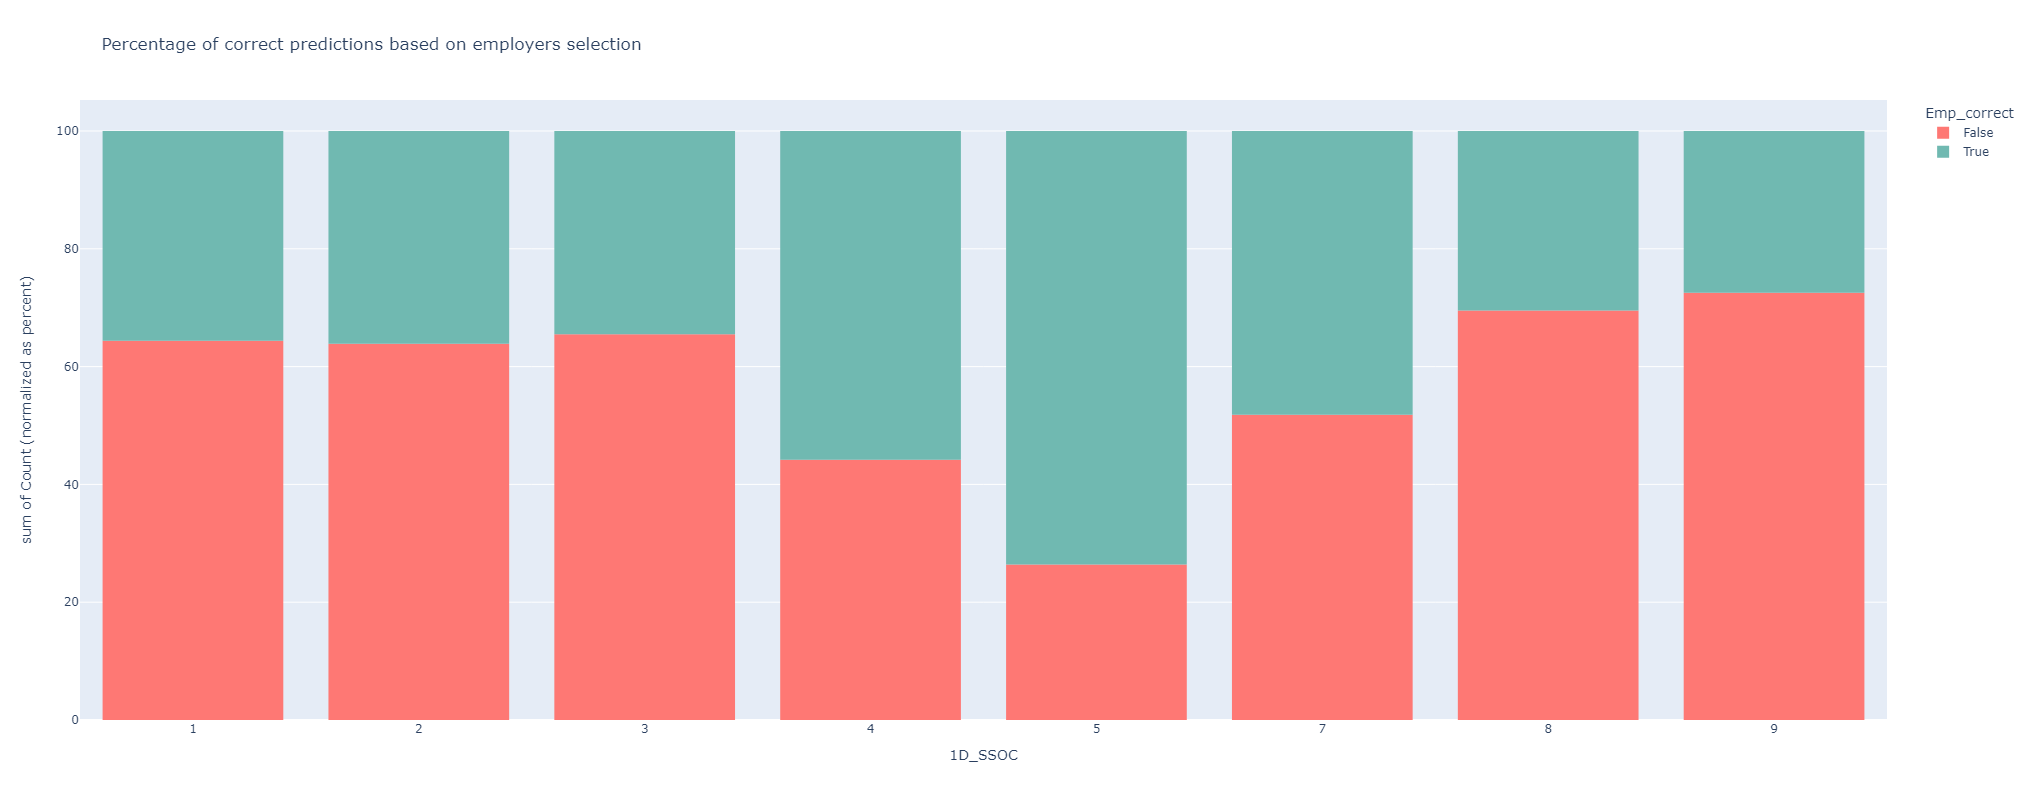

In [122]:
import plotly.express as px

fig = px.histogram(count_emp_correct, x="1D_SSOC", y="Count", color="Emp_correct", 
                   barnorm='percent', 
                   color_discrete_sequence=["#FE7874", "#70B9B1"],
                   title="Percentage of correct predictions based on employers selection")

fig.update_layout(barmode="relative")

fig.update_layout(
    autosize=False,
    width=1600,
    height=800)

fig.show()

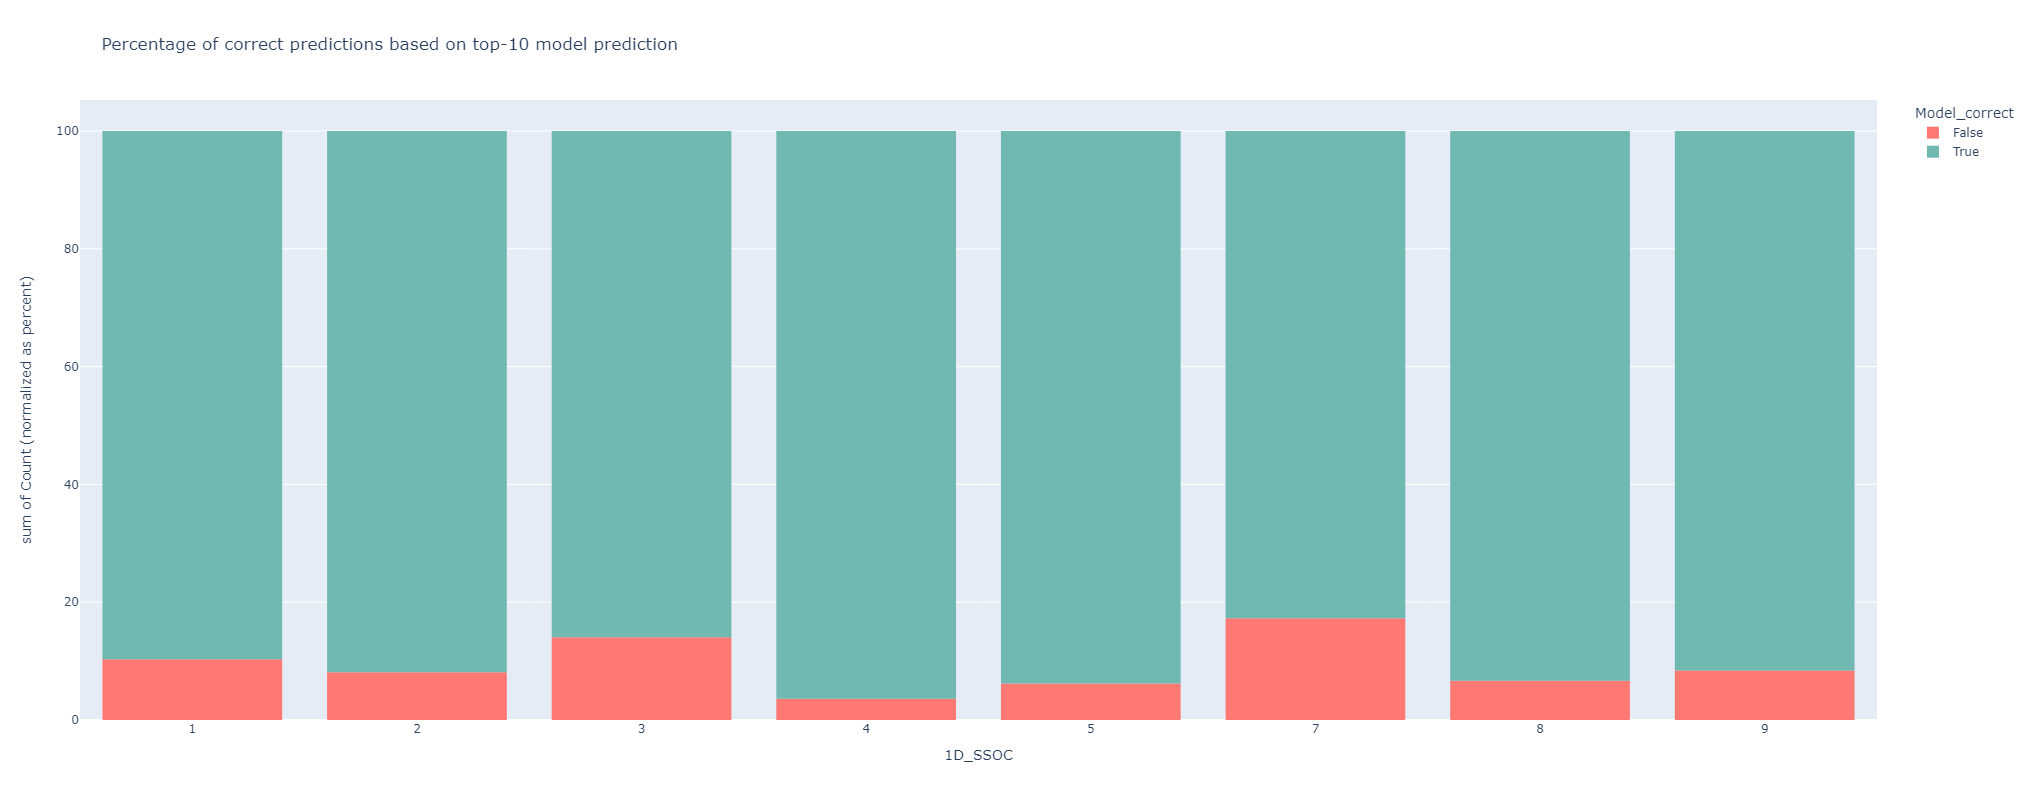

In [123]:
fig = px.histogram(count_model_correct, x="1D_SSOC", y="Count", color="Model_correct", 
                   barnorm='percent',
                   color_discrete_sequence=["#FE7874", "#70B9B1"],
                   title="Percentage of correct predictions based on top-10 model prediction")

fig.update_layout(
    autosize=False,
    width=1600,
    height=800)

fig.show()

Checking how the accuracy differs across top n prediction

In [124]:
df_across_time = df_final[["Relabelled_SSOC_2020", "pred_SSOC", "1D_SSOC"]]

In [125]:
def top_n_correct_pred(row):
    
    result = []
    
    interest = ast.literal_eval(row["pred_SSOC"])
    
    for i in range(len(interest)):

        result.append(row["Relabelled_SSOC_2020"] in interest[:i+1])
        
    return result

In [126]:
df_across_time["Result"] = df_across_time.apply(top_n_correct_pred, axis = 1)

C:\Users\Benjamin Aw\AppData\Local\Temp\ipykernel_28748\3018135234.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [127]:
df_across_time[[f"top_{i+1}_result" for i in range(10)]] = pd.DataFrame(df_across_time["Result"].tolist(), index= df_across_time.index)

C:\Users\Benjamin Aw\AppData\Local\Temp\ipykernel_28748\3280835081.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\Benjamin Aw\AppData\Local\Temp\ipykernel_28748\3280835081.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\Benjamin Aw\AppData\Local\Temp\ipykernel_28748\3280835081.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://panda

In [128]:
df_across_time = df_across_time[['1D_SSOC', "top_1_result", "top_2_result", "top_3_result", "top_4_result", "top_5_result", "top_6_result", "top_7_result", "top_8_result", "top_9_result", "top_10_result"]]

In [129]:
df_across_time

,1D_SSOC,top_1_result,top_2_result,top_3_result,top_4_result,top_5_result,top_6_result,top_7_result,top_8_result,top_9_result,top_10_result
0,4,True,True,True,True,True,True,True,True,True,True
1,5,False,True,True,True,True,True,True,True,True,True
2,2,True,True,True,True,True,True,True,True,True,True
3,2,False,False,False,False,False,True,True,True,True,True
4,2,True,True,True,True,True,True,True,True,True,True
...,...,...,...,...,...,...,...,...,...,...,...
3397,7,True,True,True,True,True,True,True,True,True,True
3398,5,True,True,True,True,True,True,True,True,True,True
3399,2,True,True,True,True,True,True,True,True,True,True
3400,2,True,True,True,True,True,True,True,True,True,True


In [130]:
lst_across_time_percentage = []

for i in range(1, 11):
    count_model_correct_across_time = df_across_time.groupby(['1D_SSOC', f"top_{i}_result"])[f"top_{i}_result"].count()
    temp = count_model_correct_across_time.groupby(level=0).apply(lambda x:100 * x / float(x.sum()))
    temp = temp[temp.index.get_level_values(1)]
    temp = temp.droplevel(1)
    temp = pd.DataFrame(temp)
    temp.reset_index(inplace=True)
    
    lst_across_time_percentage.append(temp)

In [131]:
lst_across_time_percentage = [df.set_index('1D_SSOC') for df in lst_across_time_percentage]
df_across_time_percentage = pd.concat(lst_across_time_percentage,axis=1,sort=False).reset_index()

In [132]:
df_across_time_percentage

,1D_SSOC,top_1_result,top_2_result,top_3_result,top_4_result,top_5_result,top_6_result,top_7_result,top_8_result,top_9_result,top_10_result
0,1,40.983607,62.295082,71.896956,76.580796,81.498829,85.245902,86.416862,88.056206,88.758782,89.695550
1,2,53.996339,69.615619,76.632093,81.696156,84.075656,86.699207,88.285540,89.566809,90.909091,91.885296
2,3,41.870824,57.461024,69.265033,73.942094,78.619154,80.400891,83.964365,85.077951,85.300668,85.968820
3,4,59.420290,84.057971,88.405797,92.753623,93.478261,93.478261,94.202899,94.927536,96.376812,96.376812
4,5,49.438202,75.280899,85.393258,87.078652,87.640449,89.325843,91.011236,92.134831,92.134831,93.820225
5,7,49.090909,61.818182,63.636364,67.272727,73.636364,76.363636,76.363636,78.181818,82.727273,82.727273
6,8,32.380952,53.333333,69.523810,76.190476,85.714286,89.523810,90.476190,90.476190,91.428571,93.333333
7,9,60.305344,69.465649,80.916031,82.442748,85.496183,89.312977,89.312977,89.312977,89.312977,91.603053


In [133]:
df_across_time_percentage = pd.melt(df_across_time_percentage, id_vars='1D_SSOC', value_vars=["top_1_result", "top_2_result", "top_3_result", "top_4_result", "top_5_result", "top_6_result", "top_7_result", "top_8_result", "top_9_result", "top_10_result"])

In [134]:
df_across_time_percentage.columns = ["1D_SSOC", "Top N Predictions", "Percentage accuracy"]

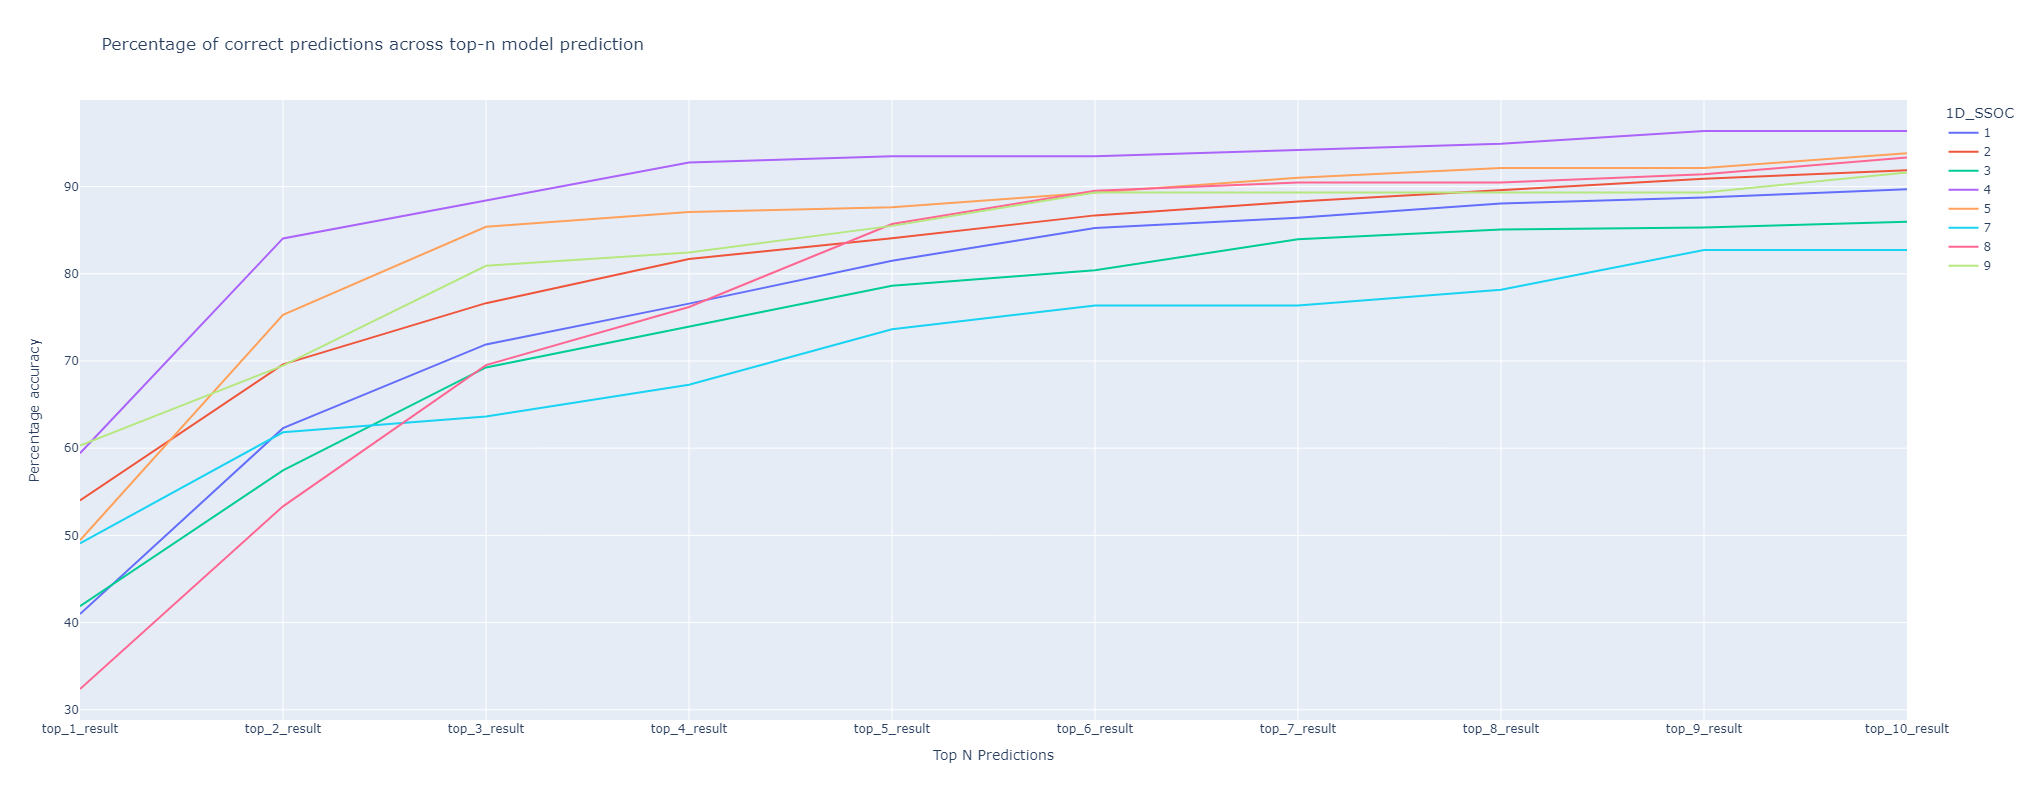

In [135]:
fig = px.line(df_across_time_percentage, x="Top N Predictions", y="Percentage accuracy", color="1D_SSOC", 
              title="Percentage of correct predictions across top-n model prediction")

fig.update_layout(
    autosize=False,
    width=1600,
    height=800)

fig.show()

Checking how the model fares based on the similarity matrix generated

In [136]:
df_similarity = df_final[["Relabelled_SSOC_2020", "emp_SSOC", "pred_SSOC", "1D_SSOC"]]

In [137]:
df_similarity["pred_SSOC"] = df_similarity["pred_SSOC"].apply(lambda x: ast.literal_eval(x))

C:\Users\Benjamin Aw\AppData\Local\Temp\ipykernel_28748\1265617740.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [138]:
df_similarity

,Relabelled_SSOC_2020,emp_SSOC,pred_SSOC,1D_SSOC
0,42241,41109,"[42241, 42245, 41101, 41201, 52440, 12241, 242...",4
1,51421,51421,"[51491, 51421, 51422, 14324, 22301, 51411, 342...",5
2,21494,21494,"[21494, 24213, 13230, 21441, 24212, 13302, 411...",2
3,21422,21422,"[31124, 21421, 71000, 24213, 21511, 21422, 214...",2
4,25121,21473,"[25121, 25122, 35123, 25140, 25113, 13302, 251...",2
...,...,...,...,...
3397,71220,71220,"[71220, 31124, 71000, 71151, 21421, 21422, 216...",7
3398,51312,51312,"[51312, 52302, 51322, 51311, 52202, 12241, 142...",5
3399,24213,13491,"[24213, 13230, 21421, 21511, 13302, 21422, 214...",2
3400,24213,13493,"[24213, 13230, 21421, 21511, 13302, 21422, 214...",2


In [139]:
df_matrix = pd.read_csv("../Data/similarity_matrix.csv", index_col= 0)

Take the inverse of the similarity score. The larger the score, the poorer the prediction. 

In [140]:
df_matrix = 1-df_matrix

In [141]:
df_matrix

,11110,11121,11122,11140,11150,11160,11201,11202,11203,12111,...,96272,96291,96292,96293,96299,X1000,X2000,X3000,X4000,X5000
11110,0.000005,0.179658,0.243126,0.290590,0.340674,0.270955,0.279713,0.275997,0.316496,0.243019,...,0.298418,0.583757,0.326227,0.357558,0.722238,0.426244,0.562330,0.444189,0.625454,0.544587
11121,0.179658,0.000004,0.195005,0.229118,0.275637,0.191428,0.165419,0.164300,0.182277,0.101082,...,0.189987,0.491805,0.238044,0.331352,0.664192,0.361702,0.471454,0.297881,0.496389,0.435434
11122,0.243126,0.195005,0.000006,0.245689,0.333491,0.239123,0.219174,0.220956,0.282976,0.245398,...,0.351385,0.546514,0.378616,0.440030,0.587278,0.348994,0.431522,0.357034,0.505873,0.453125
11140,0.290590,0.229118,0.245689,0.000003,0.236605,0.209873,0.231908,0.288698,0.322113,0.266152,...,0.431784,0.616079,0.460177,0.539123,0.691598,0.492854,0.564862,0.460490,0.468540,0.497265
11150,0.340674,0.275637,0.333491,0.236605,0.000004,0.146256,0.298463,0.314478,0.370173,0.255597,...,0.392098,0.563300,0.324130,0.507911,0.664138,0.462331,0.559333,0.378654,0.578681,0.507601
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
X1000,0.426244,0.361702,0.348994,0.492854,0.462331,0.383730,0.352466,0.301334,0.411652,0.386421,...,0.407456,0.560946,0.308694,0.431566,0.427553,0.000001,0.323775,0.366811,0.523304,0.567569
X2000,0.562330,0.471454,0.431522,0.564862,0.559333,0.505591,0.493556,0.445302,0.505258,0.535150,...,0.510809,0.633196,0.535603,0.578924,0.311068,0.323775,0.000004,0.449994,0.477651,0.531663
X3000,0.444189,0.297881,0.357034,0.460490,0.378654,0.273793,0.323064,0.307364,0.346816,0.330402,...,0.296680,0.444873,0.341311,0.413042,0.508632,0.366811,0.449994,0.000005,0.363098,0.346405
X4000,0.625454,0.496389,0.505873,0.468540,0.578681,0.474336,0.474670,0.517173,0.535237,0.569516,...,0.582390,0.696228,0.624866,0.648596,0.428398,0.523304,0.477651,0.363098,0.000004,0.415577


In [142]:
def emp_similarity(row):
    
    idx = row["Relabelled_SSOC_2020"]
    col = row["emp_SSOC"]
    
    try:
        result = df_matrix.loc[idx][col]
    except:
        print(f"column: {col}")
        result = None
    
    return result

In [145]:
def pred_similarity(row):
    
    out = []
    
    idx = row["Relabelled_SSOC_2020"]
    col = row["pred_SSOC"]
    
    for pred in col:
        out.append(df_matrix.loc[idx][pred])
    
    return out

In [143]:
df_similarity["emp_similarity"] = df_similarity.apply(emp_similarity, axis = 1)

C:\Users\Benjamin Aw\AppData\Local\Temp\ipykernel_28748\699255876.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [146]:
df_similarity["pred_similarity"] = df_similarity.apply(pred_similarity, axis = 1)

C:\Users\Benjamin Aw\AppData\Local\Temp\ipykernel_28748\2608615042.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [149]:
df_similarity["pred_similarity_avg"] = df_similarity["pred_similarity"].apply(mean)
df_similarity["pred_similarity_min"] = df_similarity["pred_similarity"].apply(min)

C:\Users\Benjamin Aw\AppData\Local\Temp\ipykernel_28748\2926591835.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\Benjamin Aw\AppData\Local\Temp\ipykernel_28748\2926591835.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [150]:
df_similarity

,Relabelled_SSOC_2020,emp_SSOC,pred_SSOC,1D_SSOC,emp_similarity,pred_similarity,pred_similarity_avg,pred_similarity_min
0,42241,41109,"[42241, 42245, 41101, 41201, 52440, 12241, 242...",4,0.685201,"[1.2762899780360826e-06, 0.14425490829218357, ...",0.200376,0.000001
1,51421,51421,"[51491, 51421, 51422, 14324, 22301, 51411, 342...",5,0.000004,"[0.25315530789857577, 4.467014923625889e-06, 0...",0.301355,0.000004
2,21494,21494,"[21494, 24213, 13230, 21441, 24212, 13302, 411...",2,0.000005,"[5.105159912810464e-06, 0.20653052056039345, 0...",0.190696,0.000005
3,21422,21422,"[31124, 21421, 71000, 24213, 21511, 21422, 214...",2,0.000005,"[0.1028424892249219, 0.08340140213216996, 0.21...",0.138778,0.000005
4,25121,21473,"[25121, 25122, 35123, 25140, 25113, 13302, 251...",2,0.227474,"[2.552579956405232e-06, 0.07760194047128277, 0...",0.128211,0.000003
...,...,...,...,...,...,...,...,...
3397,71220,71220,"[71220, 31124, 71000, 71151, 21421, 21422, 216...",7,0.000003,"[2.552579956405232e-06, 0.24284097043984787, 0...",0.208391,0.000003
3398,51312,51312,"[51312, 52302, 51322, 51311, 52202, 12241, 142...",5,0.000004,"[4.1479424292001355e-06, 0.1917829898624287, 0...",0.154578,0.000004
3399,24213,13491,"[24213, 13230, 21421, 21511, 13302, 21422, 214...",2,0.229573,"[3.828869934552337e-06, 0.32722256327526644, 0...",0.255848,0.000004
3400,24213,13493,"[24213, 13230, 21421, 21511, 13302, 21422, 214...",2,0.216882,"[3.828869934552337e-06, 0.32722256327526644, 0...",0.255848,0.000004


In [156]:
mean_distance_emp = df_similarity.groupby(["1D_SSOC"])['emp_similarity'].mean()
mean_distance_pred = df_similarity.groupby(["1D_SSOC"])['pred_similarity_min'].mean()
mean_average_distance_pred = df_similarity.groupby(["1D_SSOC"])['pred_similarity_avg'].mean()

In [154]:
mean_distance_emp

1D_SSOC
1    0.152963
2    0.163762
3    0.182080
4    0.197984
5    0.076857
7    0.149032
8    0.220109
9    0.128962
Name: emp_similarity, dtype: float64

In [155]:
mean_distance_pred

1D_SSOC
1    0.017015
2    0.013833
3    0.023776
4    0.005801
5    0.010419
7    0.033470
8    0.017056
9    0.014733
Name: pred_similarity_min, dtype: float64

In [179]:
mean_average_distance_pred

1D_SSOC
1    0.174613
2    0.175129
3    0.192207
4    0.177431
5    0.198407
7    0.275534
8    0.299103
9    0.198351
Name: pred_similarity_avg, dtype: float64

In [158]:
distance_df = pd.concat([mean_distance_emp, mean_distance_pred], axis=1)

In [161]:
distance_df = distance_df.reset_index()

In [162]:
distance_df

,1D_SSOC,emp_similarity,pred_similarity_min
0,1,0.152963,0.017015
1,2,0.163762,0.013833
2,3,0.182080,0.023776
3,4,0.197984,0.005801
4,5,0.076857,0.010419
5,7,0.149032,0.033470
6,8,0.220109,0.017056
7,9,0.128962,0.014733


In [163]:
distance_df_plot = pd.melt(distance_df, id_vars='1D_SSOC', value_vars=["emp_similarity", "pred_similarity_min"])

In [167]:
distance_df_plot.columns = ["1D_SSOC", "Prediction", "Similarity Score"]

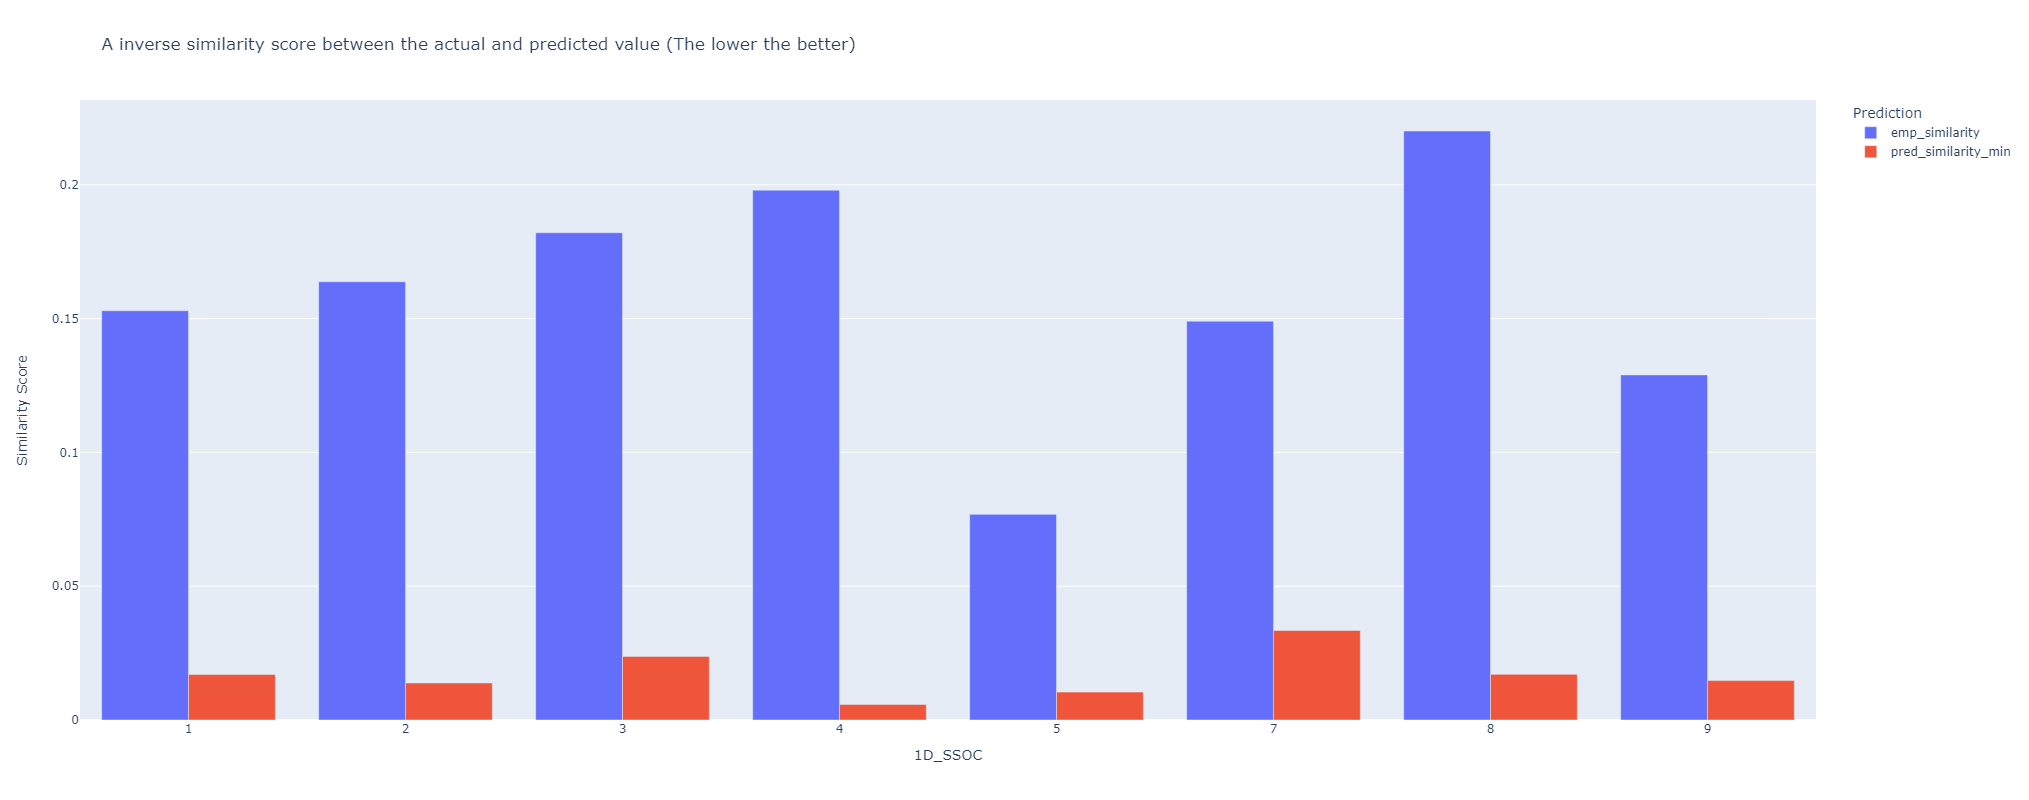

In [171]:
fig = px.bar(distance_df_plot, x="1D_SSOC", color="Prediction",
             y='Similarity Score',
             title="A inverse similarity score between the actual and predicted value (The lower the better)",
             barmode='group'
            )

fig.update_layout(
    autosize=False,
    width=1600,
    height=800)

fig.show()

In [178]:
distance_df

,1D_SSOC,emp_similarity,pred_similarity_avg
0,1,0.152963,0.174613
1,2,0.163762,0.175129
2,3,0.182080,0.192207
3,4,0.197984,0.177431
4,5,0.076857,0.198407
5,7,0.149032,0.275534
6,8,0.220109,0.299103
7,9,0.128962,0.198351


In [180]:
distance_df = pd.concat([mean_distance_emp, mean_average_distance_pred], axis=1)
distance_df = distance_df.reset_index()
distance_df_plot = pd.melt(distance_df, id_vars='1D_SSOC', value_vars=["emp_similarity", "pred_similarity_avg"])
distance_df_plot.columns = ["1D_SSOC", "Prediction", "Similarity Score"]

We can see from the plot below that the average inverse similarity score across the top 10 predictions is much higher than the employers selection. This means that (on average) some of the top 10 predictions are quite different from the actual SSOC. This could mean 2 things:
1. The assumption that the similarity matrix gives a good indication on how similar two jobs are may be incorrect.
2. Detailed descriptions are not a good indication of similar the jobs are.
3. Returning top 10 results causes too much variability across the different predictions.

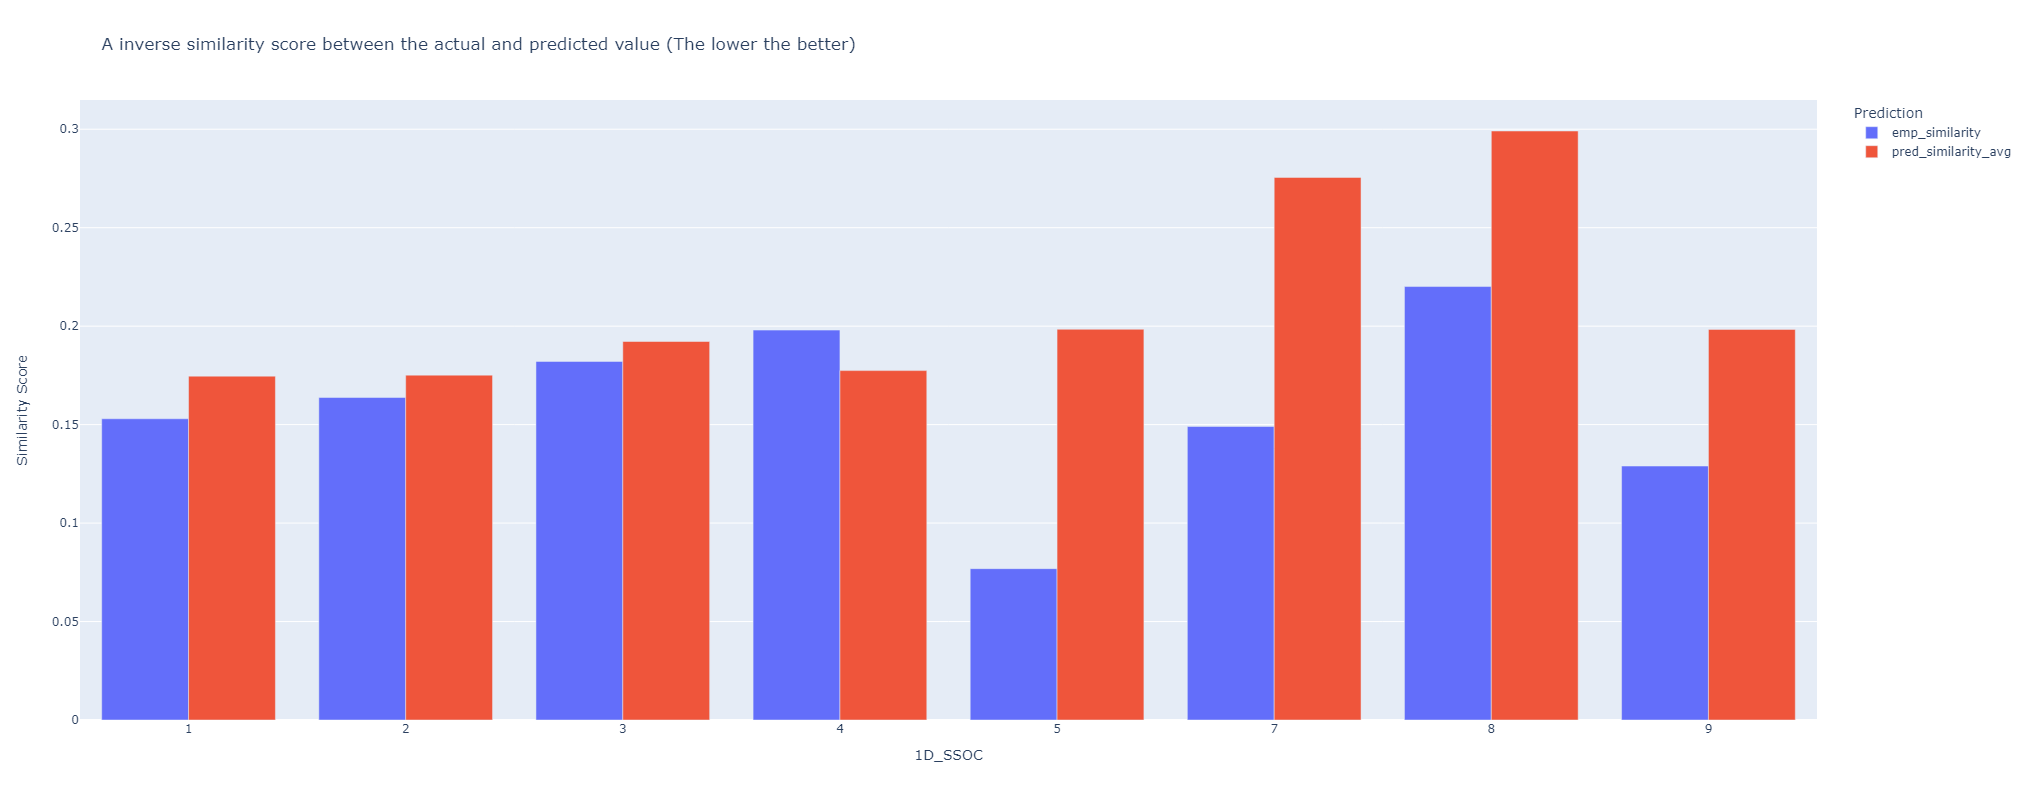

In [183]:
fig = px.bar(distance_df_plot, x="1D_SSOC", color="Prediction",
             y='Similarity Score',
             title="A inverse similarity score between the actual and predicted value (The lower the better)",
             barmode='group'
            )

fig.update_layout(
    autosize=False,
    width=1600,
    height=800)

fig.show()

Qs: What if I just took the top two predictions, will the results change?

In [185]:
df_similarity["pred_similarity_avg_top2"] = df_similarity["pred_similarity"].apply(lambda x: mean(x[:2]))

C:\Users\Benjamin Aw\AppData\Local\Temp\ipykernel_28748\2274730550.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [187]:
mean_distance_emp_top_2 = df_similarity.groupby(["1D_SSOC"])['pred_similarity_avg_top2'].mean()

In [188]:
distance_df = pd.concat([mean_distance_emp, mean_distance_emp_top_2], axis=1)
distance_df = distance_df.reset_index()
distance_df_plot = pd.melt(distance_df, id_vars='1D_SSOC', value_vars=["emp_similarity", "pred_similarity_avg_top2"])
distance_df_plot.columns = ["1D_SSOC", "Prediction", "Similarity Score"]

From the graph below, we can come to two conclusions:

1. This supports point 3 that returning top 10 results causes too much variability across the different predictions. Returning only the top 2 results drastically reduces the difference scores.
2. For Group 5, 7 and 8. There is a need to focus on improving the prediction strength for these three groups.

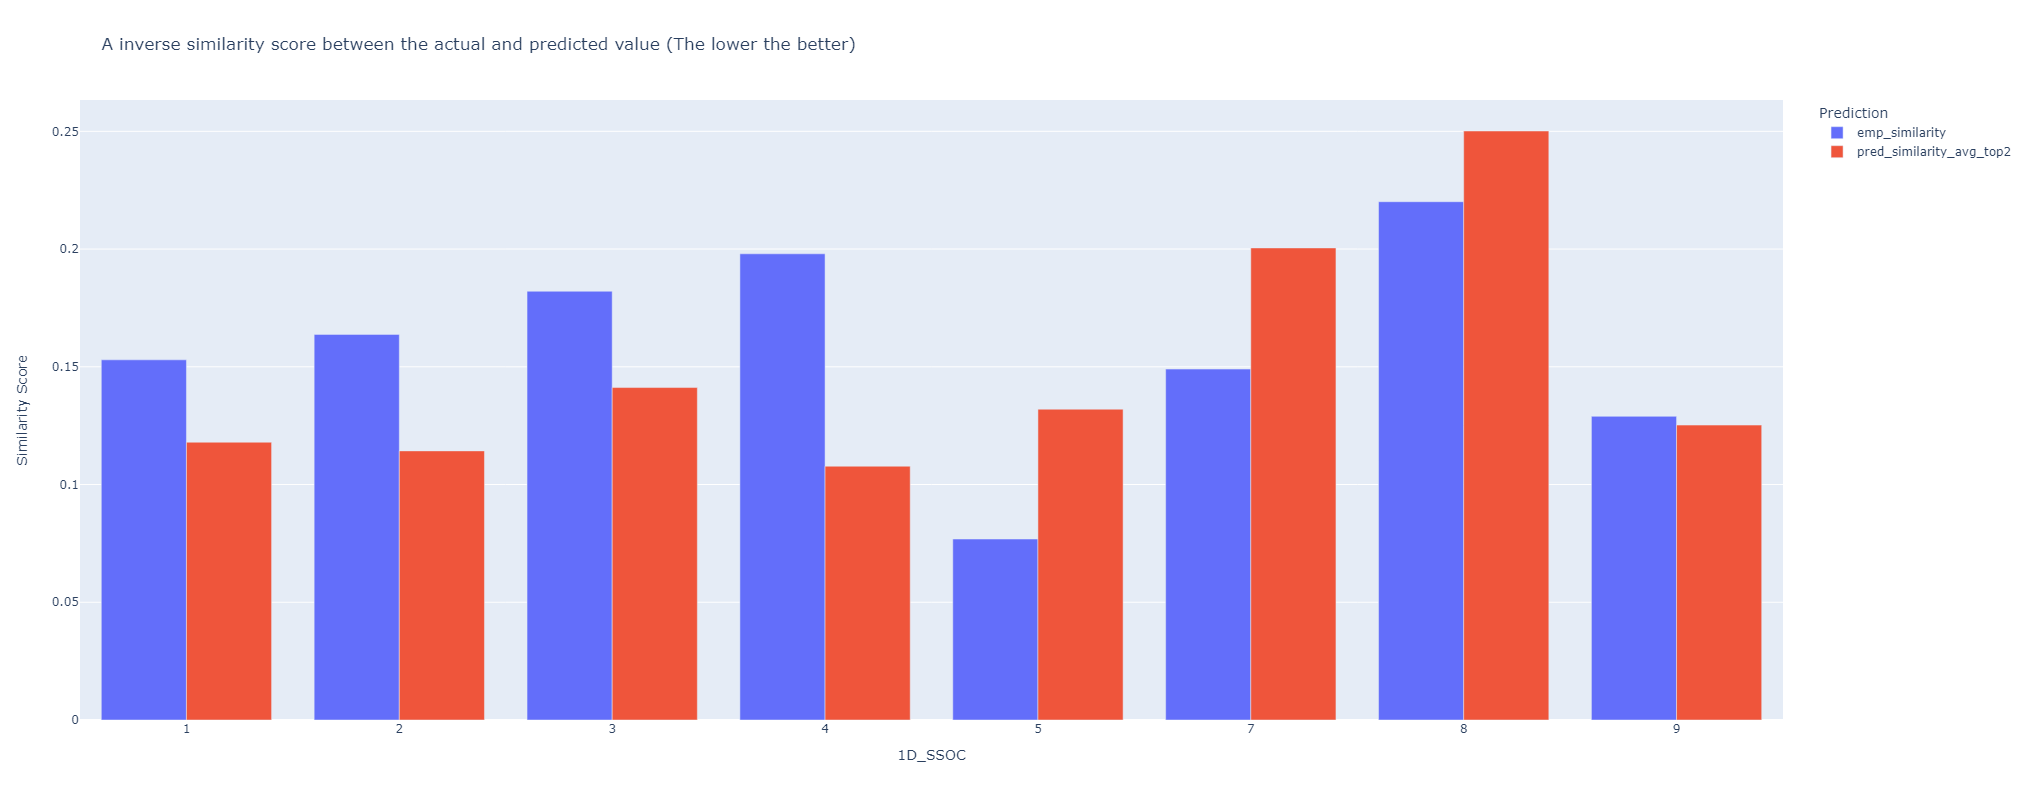

In [189]:
fig = px.bar(distance_df_plot, x="1D_SSOC", color="Prediction",
             y='Similarity Score',
             title="A inverse similarity score between the actual and predicted value (The lower the better)",
             barmode='group'
            )

fig.update_layout(
    autosize=False,
    width=1600,
    height=800)

fig.show()

To check if the relabelled SSOC are aligned the description of the job, to give us confidence in our prediction. 

In [190]:
df_final.head()

,MCF_UUID,Job_title,Relabelled_SSOC_2020,Description,Cleaned_Description,UUID,MCF_ID,emp_SSOC,pred_SSOC,Emp_correct,Model_correct,1D_SSOC
0,b58d6319d17424c0f70046994fdf14cc,Admin/Receptionist,42241,<ul>\n <li>Handling telephone calls and enqui...,Handling telephone calls and enquiries. Attend...,b58d6319d17424c0f70046994fdf14cc,MCF-2021-0042824,41109,"['42241', '42245', '41101', '41201', '52440', ...",False,True,4
1,74d2df93dc7a0d6465ae9529eaa6066e,Beautician Supervisor,51421,<p>· Understand customer needs &amp; skin cond...,"Understand customer needs & skin condition, an...",74d2df93dc7a0d6465ae9529eaa6066e,MCF-2021-0142643,51421,"['51491', '51421', '51422', '14324', '22301', ...",True,True,5
2,64a2479f5ee22238e89abad6576fe0fd,Senior / Quantity Surveyor (C&S/Tender/Project),21494,<ul>\n <li>Responsible for payment/progress c...,"Responsible for payment/progress claims, varia...",64a2479f5ee22238e89abad6576fe0fd,MCF-2021-0182163,21494,"['21494', '24213', '13230', '21441', '24212', ...",True,True,2
3,321cff2e66174e2d26607f5186254572,Building and Construction Site Engineer,21422,<p><strong>Responsibilities</strong></p>\n<ul>...,Supervise and coordinate the activities of sit...,321cff2e66174e2d26607f5186254572,MCF-2021-0159738,21422,"['31124', '21421', '71000', '24213', '21511', ...",True,True,2
4,95df6bb03f3a72b0d3468c7ce82d717e,Senior Software Engineer,25121,<p>3-5 years of relevant industry experience</...,3-5 years of relevant industry experience. Exc...,95df6bb03f3a72b0d3468c7ce82d717e,MCF-2021-0109614,21473,"['25121', '25122', '35123', '25140', '25113', ...",False,True,2


In [191]:
df_to_check = df_final.groupby(["1D_SSOC", "Model_correct"]).apply(lambda x: x.sample(frac=0.04))

In [192]:
df_to_check.head()

MCF_UUID  \
1D_SSOC Model_correct                                          
1       False         3346  ab459087fee16ece1222b0ea78197804   
                      39    8e868cff489f1a2b30bd33f76807a338   
        True          209   d24aa86f6a48161dc73f08265e9b9298   
                      2121  168a84ad171da40fad72be8e0ef6b4d4   
                      2690  524c5320375c1cc6d783d95df0d3adb0   

                                                                Job_title  \
1D_SSOC Model_correct                                                       
1       False         3346                         Regional Sales Manager   
                      39                  Team Manager (Fleet Management)   
        True          209   Property Manager (Commercial Building) $4,500   
                      2121                    Deputy Construction Manager   
                      2690                      Sales & Marketing Manager   

                           Relabelled_SSOC_2020  \
1D_SSOC Model_correct                             
1       False         3346                12213   
                      39                  13243   
        True          209                 12191   
                      2121                13230   
                      2690                12222   

                                                                  Description  \
1D_SSOC Model_correct                                                           
1       False         3346  <p><strong>The Role</strong></p>\n<p><strong>T...   
                      39    <p><strong>Reporting to the Group Manager, you...   
        True          209   <p><strong>Job Scope:</strong></p>\n<ul>\n  <l...   
                      2121  <p><strong>Job Description:</strong></p>\n<p><...   
                      2690  <p>- High Commission Rates + Incentives!</p>\n...   

                                                          Cleaned_Description  \
1D_SSOC Model_correct                                                           
1       False         3346  Provide customers with information regarding p...   
                      39    Reporting to the Group Manager, you will be ma...   
        True          209   Lead a team of property officers and technical...   
                      2121  The Deputy Construction Manager assists the Co...   
                      2690  High Commission Rates + Incentives! MUST have ...   

                                                        UUID  \
1D_SSOC Model_correct                                          
1       False         3346  ab459087fee16ece1222b0ea78197804   
                      39    8e868cff489f1a2b30bd33f76807a338   
        True          209   d24aa86f6a48161dc73f08265e9b9298   
                      2121  168a84ad171da40fad72be8e0ef6b4d4   
                      2690  524c5320375c1cc6d783d95df0d3adb0   

                                      MCF_ID emp_SSOC  \
1D_SSOC Model_correct                                   
1       False         3346  MCF-2021-0156353    12222   
                      39    MCF-2021-0044607    13499   
        True          209   MCF-2021-0194690    13499   
                      2121  MCF-2020-0272343    13230   
                      2690  MCF-2021-0148852    12222   

                                                                    pred_SSOC  \
1D_SSOC Model_correct                                                           
1       False         3346  ['33221', '52440', '33222', '42245', '33224', ...   
                      39    ['25241', '12212', '12222', '25121', '25232', ...   
        True          209   ['12191', '12112', '24213', '12133', '12113', ...   
                      2121  ['24213', '13230', '21421', '21422', '13302', ...   
                      2690  ['33221', '12222', '12212', '33224', '33223', ...   

                            Emp_correct  Model_correct 1D_SSOC  
1D_SSOC Model_correct                                           
1       False         

In [193]:
df_to_check = df_to_check.reset_index(drop = True)

In [197]:
df_final = df_final[["MCF_ID", "Job_title", "Description", "Relabelled_SSOC_2020", "emp_SSOC", "Emp_correct", "pred_SSOC", "Model_correct"]]

In [200]:
df_final.columns = ["MCF_ID", "Job Title", "Description", "Labelled SSOC", "Employer SSOC", "Employer Correct", "Prediction SSOC", "Prediction Correct"]

In [217]:
def index_creation(row):
    
    label = row["Labelled SSOC"]
    lst = ast.literal_eval(row["Prediction SSOC"])
    
    try:
        return lst.index(label)
    except ValueError:
        return None

In [218]:
df_final["Prediction Index"] = df_final.apply(index_creation, axis = 1)

C:\Users\Benjamin Aw\AppData\Local\Temp\ipykernel_28748\1546602255.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [223]:
df_final.to_csv("../Data/For WSG predictions.csv", index = False)